In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Chargement des données
df = pd.read_csv('Mall_Customers.csv')

# Affichage des premières lignes
print(df.head())

   CustomerID   Genre   Age  Annual Income  Spending Score
0           1    Male   NaN           15.0            39.0
1           2    Male   NaN           15.0             NaN
2           3  Female  20.0           16.0             6.0
3           4  Female  23.0           16.0             NaN
4           5  Female  31.0           17.0            40.0


In [3]:
print("\nInformations sur le dataset:")
print(f"Nombre de lignes: {df.shape[0]}")
print(f"Nombre de colonnes: {df.shape[1]}")
print("\nTypes de données:")
print(df.dtypes)


Informations sur le dataset:
Nombre de lignes: 200
Nombre de colonnes: 5

Types de données:
CustomerID          int64
Genre              object
Age               float64
Annual Income     float64
Spending Score    float64
dtype: object


In [4]:
print("\nStatistiques descriptives:")
print(df[['Age', 'Annual Income', 'Spending Score']].describe())


Statistiques descriptives:
              Age  Annual Income  Spending Score
count  194.000000     196.000000      192.000000
mean    39.257732      62.204082       51.494792
std     13.949040      38.169113       31.175571
min     18.000000       1.000000        1.000000
25%     29.000000      40.000000       35.000000
50%     36.000000      60.000000       50.000000
75%     49.000000      78.000000       72.000000
max     70.000000     280.000000      250.000000


In [5]:
print("\nValeurs manquantes par colonne:")
print(df.isnull().sum())


Valeurs manquantes par colonne:
CustomerID        0
Genre             0
Age               6
Annual Income     4
Spending Score    8
dtype: int64



Matrice de corrélation:
                     Age  Annual Income  Spending Score
Age             1.000000      -0.010648       -0.314627
Annual Income  -0.010648       1.000000        0.195037
Spending Score -0.314627       0.195037        1.000000


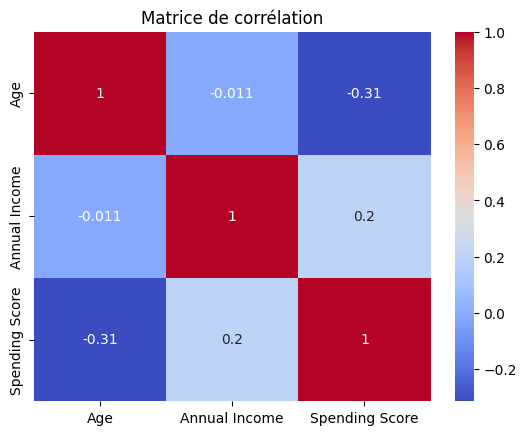

In [6]:
# Calcul de la corrélation
corr = df[['Age', 'Annual Income', 'Spending Score']].corr()

# Affichage
print("\nMatrice de corrélation:")
print(corr)

# Visualisation
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

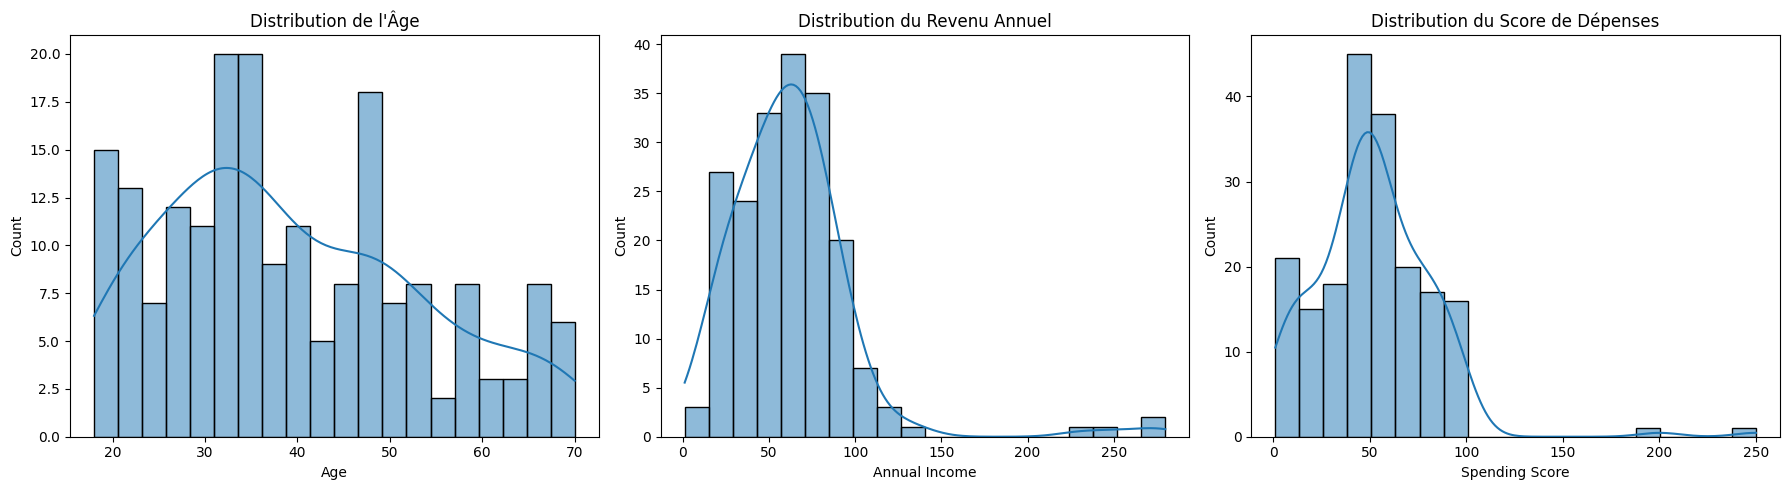

In [7]:
# Configuration des graphiques
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogramme pour l'âge
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution de l\'Âge')

# Histogramme pour le revenu annuel
sns.histplot(df['Annual Income'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution du Revenu Annuel')

# Histogramme pour le score de dépenses
sns.histplot(df['Spending Score'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution du Score de Dépenses')

plt.tight_layout()
plt.show()

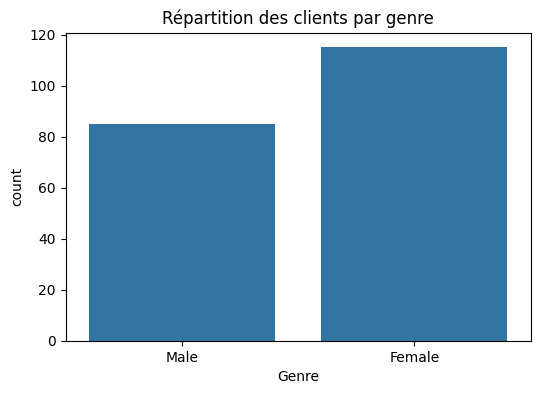

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Genre')
plt.title('Répartition des clients par genre')
plt.show()

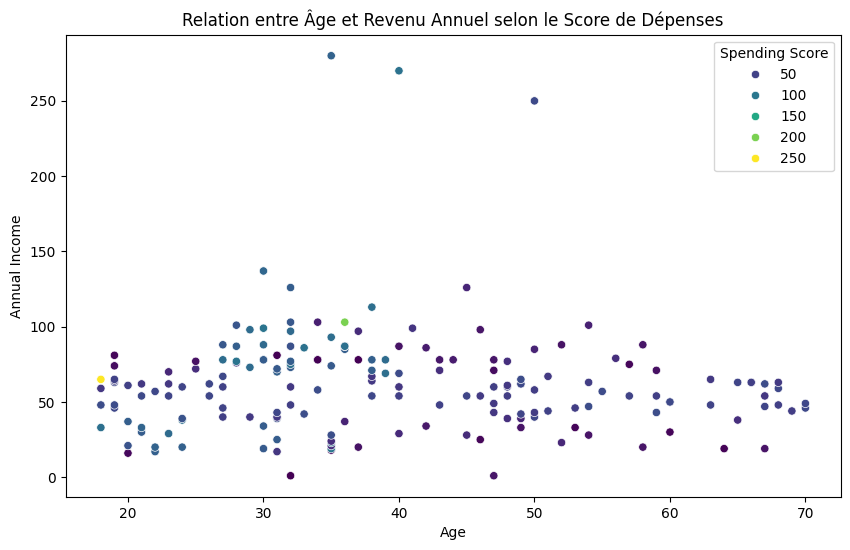

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Annual Income', hue='Spending Score', palette='viridis')
plt.title('Relation entre Âge et Revenu Annuel selon le Score de Dépenses')
plt.show()

In [10]:
# Calcul de l'IQR
Q1 = df['Annual Income'].quantile(0.25)
Q3 = df['Annual Income'].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des outliers
outliers = df[(df['Annual Income'] < lower_bound) | (df['Annual Income'] > upper_bound)]
print(f"\nNombre de valeurs aberrantes dans Annual Income: {len(outliers)}")

# Remplacement des outliers par la médiane
median_income = df['Annual Income'].median()
df['Annual Income'] = np.where((df['Annual Income'] < lower_bound) | (df['Annual Income'] > upper_bound), 
                              median_income, 
                              df['Annual Income'])


Nombre de valeurs aberrantes dans Annual Income: 5


In [11]:
# Imputation par la médiane pour les variables numériques
numeric_cols = ['Age', 'Annual Income', 'Spending Score']
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)
    
# Vérification qu'il n'y a plus de valeurs manquantes
print("\nValeurs manquantes après imputation:")
print(df.isnull().sum())


Valeurs manquantes après imputation:
CustomerID        0
Genre             0
Age               0
Annual Income     0
Spending Score    0
dtype: int64


C:\Users\youss\AppData\Local\Temp\ipykernel_34332\260125862.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\youss\AppData\Local\Temp\ipykernel_34332\260125862.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [12]:
# Encodage one-hot
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)
print("\nAprès encodage:")
print(df.head())


Après encodage:
   CustomerID   Age  Annual Income  Spending Score  Genre_Male
0           1  36.0           15.0            39.0        True
1           2  36.0           15.0            50.0        True
2           3  20.0           16.0             6.0       False
3           4  23.0           16.0            50.0       False
4           5  31.0           17.0            40.0       False


In [13]:
# Initialisation du scaler
scaler = StandardScaler()

# Standardisation
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("\nAprès standardisation:")
print(df[numeric_cols].head())


Après standardisation:
        Age  Annual Income  Spending Score
0 -0.230421      -1.743471       -0.408140
1 -0.230421      -1.743471       -0.047099
2 -1.397110      -1.702760       -1.491263
3 -1.178356      -1.702760       -0.047099
4 -0.595011      -1.662048       -0.375319


In [14]:
# Sélection des variables pour le clustering
X = df[['Annual Income', 'Spending Score']]

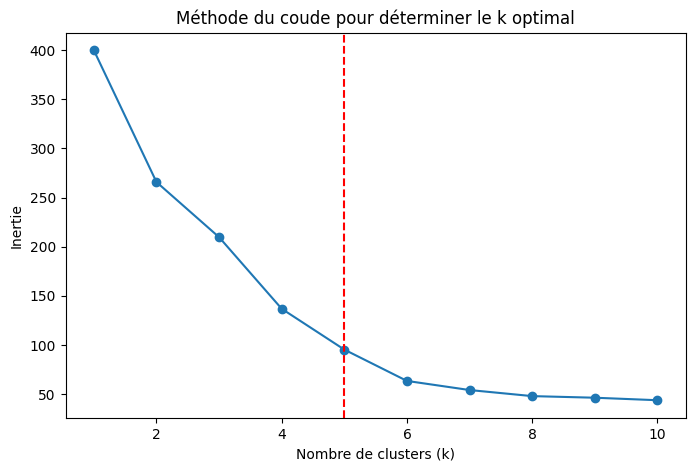


Nombre optimal de clusters: 5


In [15]:
# Calcul de l'inertie pour différentes valeurs de k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Utilisation de KneeLocator pour trouver le coude
kl = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
optimal_k = kl.elbow

# Visualisation
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le k optimal')
plt.show()

print(f"\nNombre optimal de clusters: {optimal_k}")

In [16]:
# Application de K-Means avec le k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

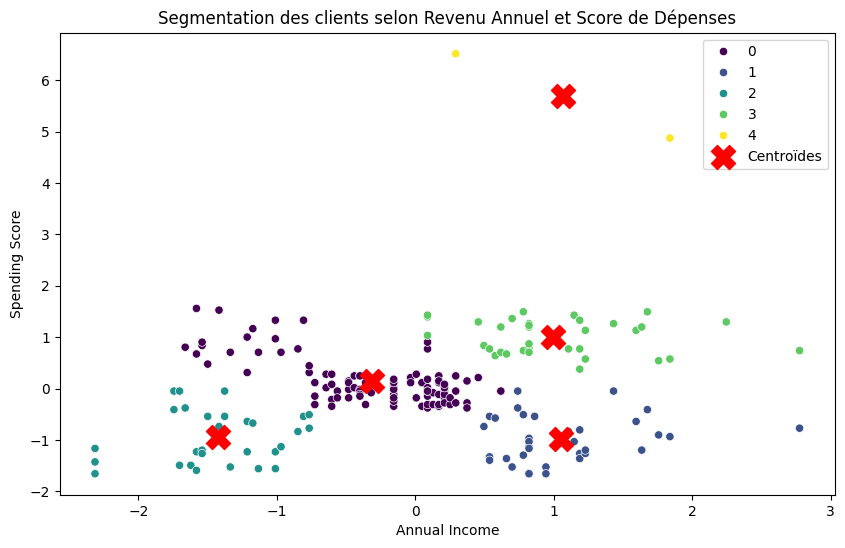

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income', y='Spending Score', hue='Cluster', palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroïdes')
plt.title('Segmentation des clients selon Revenu Annuel et Score de Dépenses')
plt.legend()
plt.show()

# Attribution de labels aux clusters
cluster_labels = {
    0: "Clients à revenu moyen et dépenses modérées",
    1: "Clients à revenu élevé et dépenses élevées",
    2: "Clients à revenu faible et dépenses élevées",
    3: "Clients à revenu élevé et dépenses faibles",
    4: "Clients à revenu faible et dépenses faibles"
}

df['CustomerType'] = df['Cluster'].map(cluster_labels)

In [18]:
# La colonne a déjà été ajoutée à l'étape précédente
print("\nDataFrame avec les clusters:")
print(df[['CustomerID', 'Annual Income', 'Spending Score', 'Cluster', 'CustomerType']].head())


DataFrame avec les clusters:
   CustomerID  Annual Income  Spending Score  Cluster  \
0           1      -1.743471       -0.408140        2   
1           2      -1.743471       -0.047099        2   
2           3      -1.702760       -1.491263        2   
3           4      -1.702760       -0.047099        2   
4           5      -1.662048       -0.375319        2   

                                  CustomerType  
0  Clients à revenu faible et dépenses élevées  
1  Clients à revenu faible et dépenses élevées  
2  Clients à revenu faible et dépenses élevées  
3  Clients à revenu faible et dépenses élevées  
4  Clients à revenu faible et dépenses élevées  


In [19]:
# Sauvegarde en CSV
df.to_csv('customers_clustered.csv', index=False)
print("\nDataFrame sauvegardé dans 'customers_clustered.csv'")


DataFrame sauvegardé dans 'customers_clustered.csv'
